# Statistical Analysis of Animal Longevity Across Vertebrate Classes

**Author:** Tim Wilcoxson
**Date:** February 2026
**Course:** Udacity ND608 -- Data and Statistical Reasoning
**Dataset:** AnAge -- The Animal Ageing and Longevity Database
**Source:** [Human Ageing Genomic Resources](https://genomics.senescence.info/species/)

---

This notebook performs a complete statistical analysis of the AnAge database
(4,645 species, 31 variables) to investigate how maximum lifespan varies across
vertebrate classes and to quantify the relationship between body size and
longevity. The analysis includes descriptive statistics, four visualizations,
assumption checking, and a formal hypothesis test with post-hoc comparisons.

## 1. Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations
import os

# Plotting defaults: colorblind-safe palette, high-resolution output
sns.set_theme(style='whitegrid', palette='colorblind')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 120)

FIGURES_DIR = 'figures/'
os.makedirs(FIGURES_DIR, exist_ok=True)

print('All libraries loaded successfully.')

All libraries loaded successfully.


## 2. Data Loading

In [2]:
# Load the AnAge dataset (4,645 species x 31 variables, CSV format)
df = pd.read_csv('data/anage_data.csv', na_values=['', 'NA'])

print(f'Dataset shape: {df.shape[0]:,} rows x {df.shape[1]} columns')
print(f'\nColumn data types:')
print(df.dtypes)
print(f'\nFirst 5 rows:')
df.head()

Dataset shape: 4,645 rows x 31 columns

Column data types:
HAGRID                                int64
Kingdom                                 str
Phylum                                  str
Class                                   str
Order                                   str
Family                                  str
Genus                                   str
Species                                 str
Common name                             str
Female maturity (days)              float64
Male maturity (days)                float64
Gestation/Incubation (days)         float64
Weaning (days)                      float64
Litter/Clutch size                  float64
Litters/Clutches per year           float64
Inter-litter/Interbirth interval    float64
Birth weight (g)                    float64
Weaning weight (g)                  float64
Adult weight (g)                    float64
Growth rate (1/days)                float64
Maximum longevity (yrs)             float64
Source           

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Escarpia,laminata,Escarpia laminata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.00,1466,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1466
1,5,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Lamellibrachia,luymesi,Lamellibrachia luymesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.00,652,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,652
2,6,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Seepiophila,jonesi,Seepiophila jonesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.00,1467,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,1467
3,8,Animalia,Arthropoda,Arachnida,Araneae,Theridiidae,Latrodectus,hasselti,Australian redback spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,medium,low,NaN,NaN,NaN,NaN,NaN,1455
4,9,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"


## 3. Data Cleaning and Preparation

In [3]:
# Assess missing data across all columns
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_report = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).query('missing_count > 0').sort_values('missing_pct', ascending=False)

print(f'Columns with missing values ({len(missing_report)} of {len(df.columns)}):')
missing_report

Columns with missing values (19 of 31):


,missing_count,missing_pct
IMR (per yr),4602,99.1
MRDT (yrs),4602,99.1
Weaning weight (g),4261,91.7
Temperature (K),4151,89.4
Growth rate (1/days),4086,88.0
Metabolic rate (W),4018,86.5
Body mass (g),4018,86.5
Weaning (days),3877,83.5
Inter-litter/Interbirth interval,3880,83.5
Birth weight (g),3415,73.5


In [4]:
# Rename columns to snake_case for consistent programmatic access
rename_map = {
    'Common name': 'common_name',
    'Maximum longevity (yrs)': 'max_longevity_yrs',
    'Adult weight (g)': 'adult_weight_g',
    'Female maturity (days)': 'female_maturity_days',
    'Male maturity (days)': 'male_maturity_days',
    'Gestation/Incubation (days)': 'gestation_days',
    'Litter/Clutch size': 'litter_size',
    'Litters/Clutches per year': 'litters_per_year',
    'Birth weight (g)': 'birth_weight_g',
    'Weaning weight (g)': 'weaning_weight_g',
    'Weaning (days)': 'weaning_days',
    'Growth rate (1/days)': 'growth_rate',
    'Inter-litter/Interbirth interval': 'interbirth_interval',
    'Metabolic rate (W)': 'metabolic_rate_w',
    'Body mass (g)': 'body_mass_g',
    'Temperature (K)': 'temperature_k',
    'Sample size': 'sample_size',
    'Specimen origin': 'specimen_origin',
    'Data quality': 'data_quality',
    'IMR (per yr)': 'imr',
    'MRDT (yrs)': 'mrdt',
    'Source': 'source',
    'References': 'references'
}
df = df.rename(columns=rename_map)

# Log10 transforms for variables spanning many orders of magnitude.
# Body weight ranges from 0.5 g (insects) to 136,000,000 g (blue whale);
# longevity ranges from 0.01 to 15,000 years. Log10 is standard in
# allometric studies because 1 unit = a 10-fold change.
df['log10_longevity'] = np.log10(df['max_longevity_yrs'])
df['log10_adult_weight'] = np.log10(df['adult_weight_g'])

# Define the five major vertebrate classes for comparative analysis
VERTEBRATE_CLASSES = ['Mammalia', 'Aves', 'Teleostei', 'Reptilia', 'Amphibia']

print('Species per taxonomic class (top 10):')
print(df['Class'].value_counts().head(10))
vert_count = df[df['Class'].isin(VERTEBRATE_CLASSES)].shape[0]
print(f'\nFive target classes contain {vert_count:,} of {len(df):,} total species')

# Save cleaned dataset for reproducibility
df.to_csv('data/anage_cleaned.csv', index=False)
print(f'Cleaned dataset saved: {len(df):,} rows x {len(df.columns)} columns')

Species per taxonomic class (top 10):
Class
Aves                  1513
Mammalia              1349
Teleostei              806
Reptilia               547
Amphibia               181
Chondrichthyes         117
Bivalvia                43
Cephalaspidomorphi      16
Chondrostei             14
Insecta                 13
Name: count, dtype: int64

Five target classes contain 4,396 of 4,645 total species
Cleaned dataset saved: 4,645 rows x 33 columns


## 4. Descriptive Statistics

In [5]:
# Summary statistics for key numeric variables
numeric_cols = ['max_longevity_yrs', 'adult_weight_g', 'female_maturity_days',
                'gestation_days', 'litter_size', 'birth_weight_g']
df[numeric_cols].describe().round(2)

,max_longevity_yrs,adult_weight_g,female_maturity_days,gestation_days,litter_size,birth_weight_g
count,4141.00,3.663000e+03,2485.00,1835.00,2.093000e+03,1230.00
mean,25.52,1.763312e+05,1029.44,88.74,1.449034e+05,11450.08
std,251.24,3.294818e+06,1656.83,196.46,6.557596e+06,107196.99
min,0.01,5.000000e-01,3.00,1.00,1.000000e+00,0.00
25%,8.80,4.750000e+01,365.00,21.00,1.000000e+00,3.24
50%,15.00,4.565000e+02,578.00,36.00,3.000000e+00,24.65
75%,24.00,3.500000e+03,1186.00,126.00,5.000000e+00,250.00
max,15000.00,1.360000e+08,56940.00,7397.00,3.000000e+08,2000000.00


In [6]:
# Categorical variable distributions
print('Data quality ratings:')
print(df['data_quality'].value_counts())
print('\nSpecimen origin:')
print(df['specimen_origin'].value_counts())

# Longevity statistics grouped by vertebrate class
print('\nLongevity by vertebrate class:')
class_stats = (
    df[df['Class'].isin(VERTEBRATE_CLASSES)]
    .groupby('Class')['max_longevity_yrs']
    .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    .round(2)
    .sort_values('median', ascending=False)
)
class_stats

Data quality ratings:
data_quality
acceptable      3926
low              504
high             108
questionable     107
Name: count, dtype: int64

Specimen origin:
specimen_origin
wild         2100
captivity    1920
unknown       625
Name: count, dtype: int64

Longevity by vertebrate class:


,count,mean,median,std,min,max
Class,,,,,,
Reptilia,526,22.02,17.80,17.81,1.30,177.0
Mammalia,1029,19.76,17.00,15.60,2.10,211.0
Aves,1394,17.78,14.60,11.36,0.60,83.0
Amphibia,162,14.88,11.95,10.71,2.00,102.0
Teleostei,798,16.97,10.00,21.56,0.16,205.0


**Interpretation of Descriptive Statistics**

- **Right-skewed distribution:** The overall mean longevity (25.5 years) is
  nearly double the median (15.0 years), indicating severe right-skew. A small
  number of exceptionally long-lived species (up to 15,000 years for deep-sea
  glass sponges) inflate the mean. This motivates log transformations and
  non-parametric tests in subsequent sections.
- **Class-level differences:** Reptilia has the highest median longevity
  (17.8 years), followed by Mammalia (17.0 years). Teleostei (bony fish) has
  the lowest median (10.0 years) but the widest spread (std = 21.6), reflecting
  enormous diversity from short-lived tropical fish to sturgeon exceeding
  200 years.
- **Missing data patterns:** Longevity is 89% complete and adult weight is
  79% complete, making them the most reliable analysis variables. Metabolic
  rate is only 14% complete, preventing metabolic scaling analysis.
- **Data provenance:** 85% of records have "acceptable" quality ratings.
  Approximately 45% come from wild specimens and 41% from captivity, which
  is important context for interpreting maximum longevity values.

## 5. Visualizations

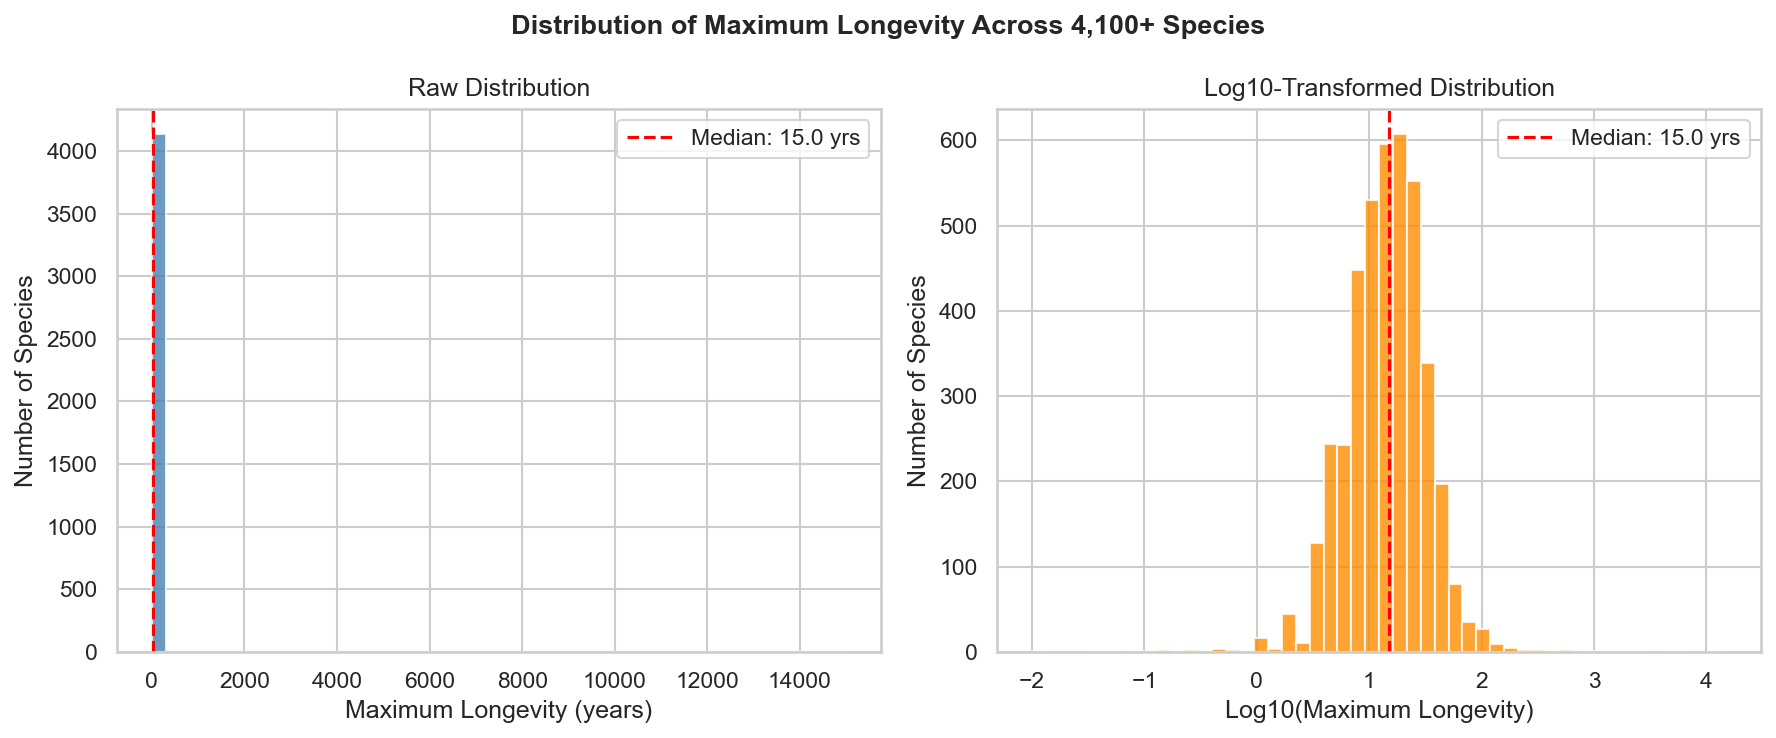

Figure 1 saved.


In [7]:
# Figure 1: Distribution of Maximum Longevity (raw vs. log-transformed)
# Side-by-side comparison demonstrates why log transformation is necessary:
# the raw histogram is dominated by extreme right-tail values.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

longevity = df['max_longevity_yrs'].dropna()

# Left panel: raw values
axes[0].hist(longevity, bins=50, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Maximum Longevity (years)')
axes[0].set_ylabel('Number of Species')
axes[0].set_title('Raw Distribution')
axes[0].axvline(longevity.median(), color='red', linestyle='--',
                label=f'Median: {longevity.median():.1f} yrs')
axes[0].legend()

# Right panel: log10-transformed (reveals bell-shaped pattern)
log_long = df['log10_longevity'].dropna()
axes[1].hist(log_long, bins=50, color='darkorange', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Log10(Maximum Longevity)')
axes[1].set_ylabel('Number of Species')
axes[1].set_title('Log10-Transformed Distribution')
axes[1].axvline(log_long.median(), color='red', linestyle='--',
                label=f'Median: {10**log_long.median():.1f} yrs')
axes[1].legend()

fig.suptitle('Distribution of Maximum Longevity Across 4,100+ Species',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}fig1_longevity_distribution.png', bbox_inches='tight')
plt.show()
print('Figure 1 saved.')

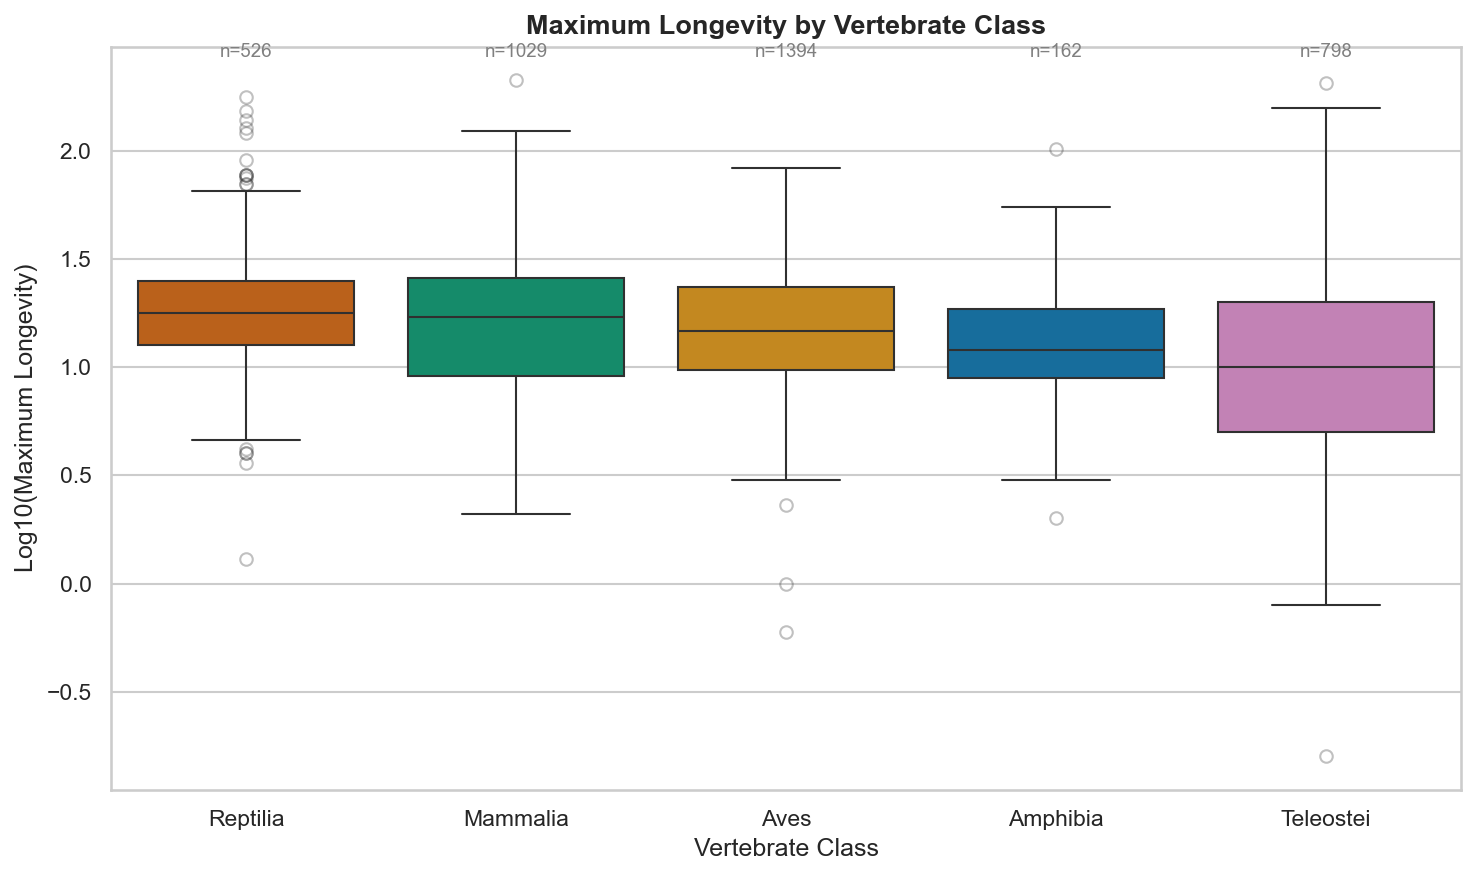

Figure 2 saved.


In [8]:
# Figure 2: Longevity by Vertebrate Class (boxplot)
# Visual comparison of class-level distributions, ordered by median longevity.
top5_df = df[df['Class'].isin(VERTEBRATE_CLASSES)].copy()
order = (top5_df.groupby('Class')['max_longevity_yrs']
         .median().sort_values(ascending=False).index)

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=top5_df, x='Class', y='log10_longevity', hue='Class',
            order=order, palette='colorblind', legend=False,
            flierprops={'alpha': 0.3}, ax=ax)
ax.set_xlabel('Vertebrate Class')
ax.set_ylabel('Log10(Maximum Longevity)')
ax.set_title('Maximum Longevity by Vertebrate Class', fontsize=13, fontweight='bold')

# Annotate each box with sample size
for i, cls in enumerate(order):
    n = top5_df[top5_df['Class'] == cls]['log10_longevity'].notna().sum()
    ax.text(i, ax.get_ylim()[1] * 0.98, f'n={n}', ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}fig2_longevity_by_class.png', bbox_inches='tight')
plt.show()
print('Figure 2 saved.')

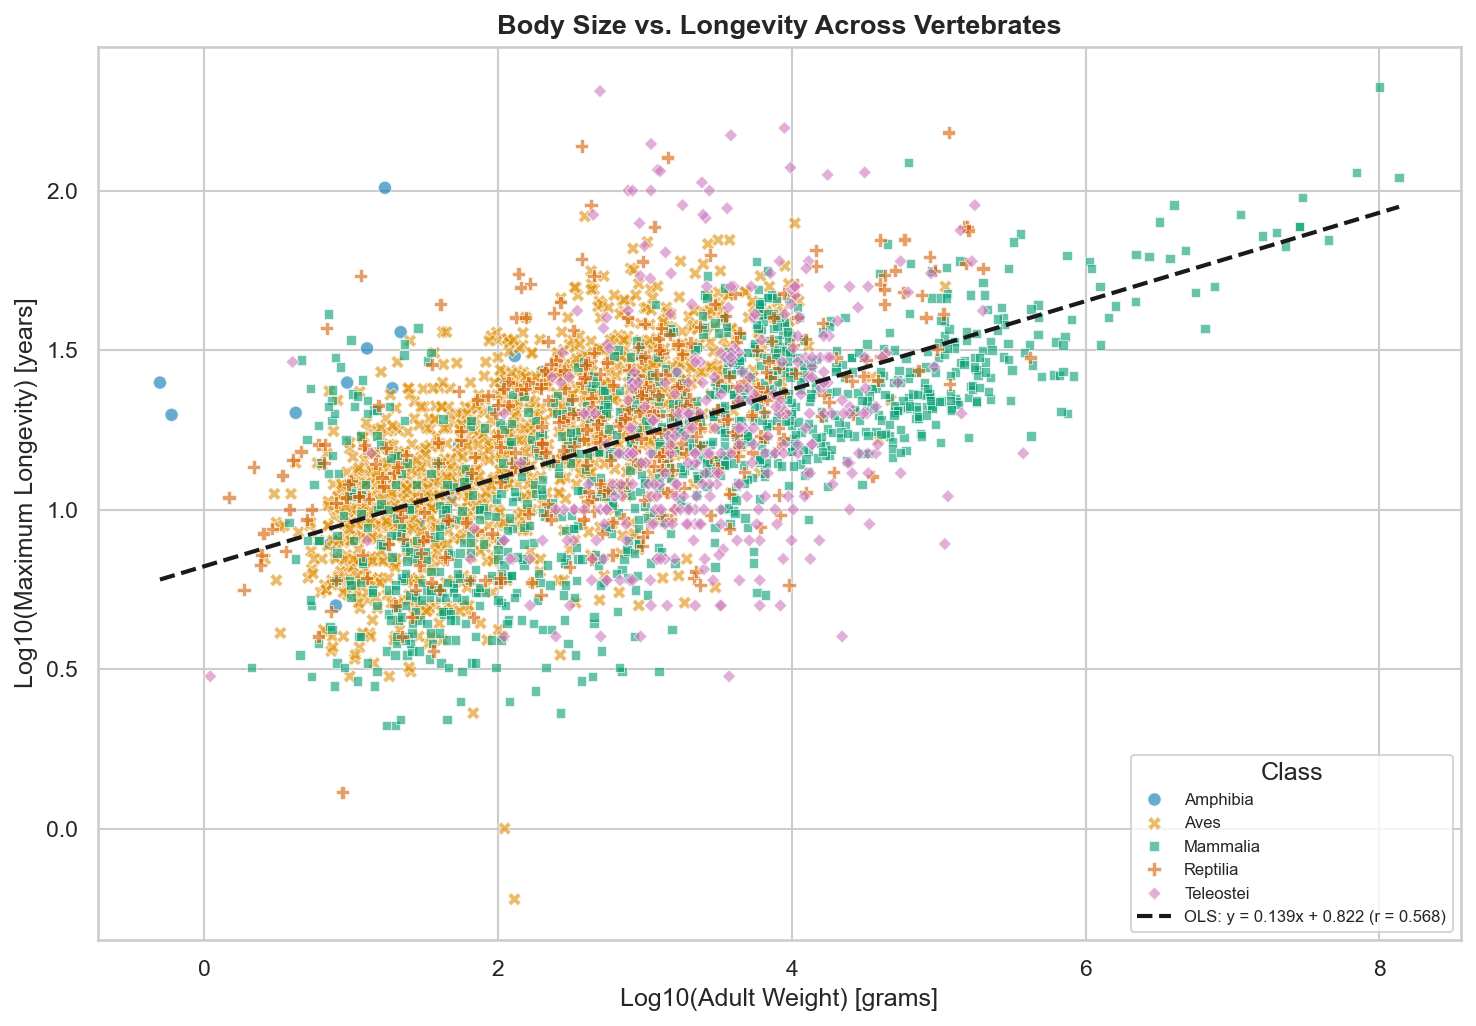

Figure 3 saved. Pearson r = 0.5678, p = 8.43e-267, n = 3131


In [9]:
# Figure 3: Body Weight vs. Longevity (allometric scaling)
# Classic biological relationship: larger animals tend to live longer.
# Plotted on log-log axes to linearize the power-law relationship.
subset = df.dropna(subset=['log10_adult_weight', 'log10_longevity'])
subset = subset[subset['Class'].isin(VERTEBRATE_CLASSES)]

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=subset, x='log10_adult_weight', y='log10_longevity',
                hue='Class', style='Class', alpha=0.6, s=40, ax=ax)

# OLS regression line quantifying the overall trend
slope, intercept, r_val, p_val, se = stats.linregress(
    subset['log10_adult_weight'], subset['log10_longevity'])
x_line = np.linspace(subset['log10_adult_weight'].min(),
                     subset['log10_adult_weight'].max(), 100)
ax.plot(x_line, intercept + slope * x_line, 'k--', linewidth=2,
        label=f'OLS: y = {slope:.3f}x + {intercept:.3f} (r = {r_val:.3f})')

ax.set_xlabel('Log10(Adult Weight) [grams]')
ax.set_ylabel('Log10(Maximum Longevity) [years]')
ax.set_title('Body Size vs. Longevity Across Vertebrates',
             fontsize=13, fontweight='bold')
ax.legend(title='Class', fontsize=8)
plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}fig3_weight_vs_longevity.png', bbox_inches='tight')
plt.show()
print(f'Figure 3 saved. Pearson r = {r_val:.4f}, p = {p_val:.2e}, n = {len(subset)}')

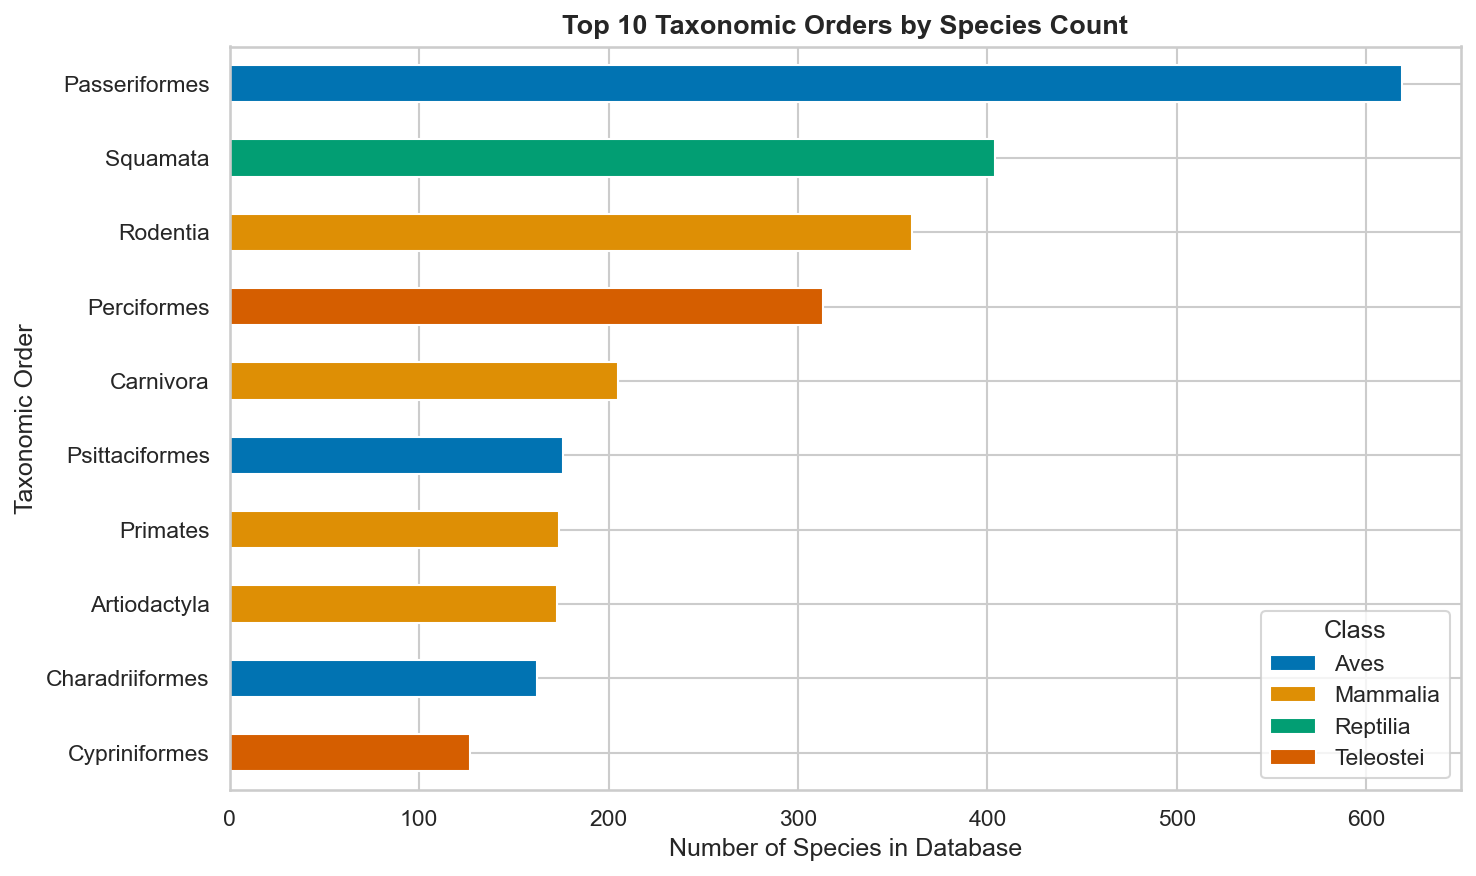

Figure 4 saved.


In [10]:
# Figure 4: Top 10 Taxonomic Orders by Species Count
# Reveals sampling bias: some orders are far more represented than others.
order_totals = df.groupby('Order').size().nlargest(10).sort_values(ascending=True)
order_class = df[df['Order'].isin(order_totals.index)].groupby('Order')['Class'].agg(
    lambda x: x.value_counts().index[0])

colors = sns.color_palette('colorblind', n_colors=len(order_class.unique()))
class_color_map = dict(zip(sorted(order_class.unique()), colors))
bar_colors = [class_color_map[order_class[o]] for o in order_totals.index]

fig, ax = plt.subplots(figsize=(10, 6))
order_totals.plot.barh(ax=ax, color=bar_colors, edgecolor='white')
ax.set_xlabel('Number of Species in Database')
ax.set_ylabel('Taxonomic Order')
ax.set_title('Top 10 Taxonomic Orders by Species Count',
             fontsize=13, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=class_color_map[c], label=c)
                   for c in sorted(order_class.unique())]
ax.legend(handles=legend_elements, title='Class', loc='lower right')

plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}fig4_top_orders.png', bbox_inches='tight')
plt.show()
print('Figure 4 saved.')

## 6. Hypothesis Test

**Research Question:** Does maximum longevity differ significantly across
vertebrate classes (Aves, Mammalia, Teleostei, Reptilia, Amphibia)?

**H₀ (Null Hypothesis):** The distribution of maximum longevity is the same
across all five vertebrate classes.

**H₁ (Alternative Hypothesis):** At least one class has a significantly
different longevity distribution.

**Analytical Design:** Following the Initial Data Analysis (IDA) framework
for reproducible analysis (Lusa et al., 2024), we first screen the data
for distributional properties and assumption violations before selecting
a test. We then compare two approaches:

1. **Baseline (Parametric):** One-way ANOVA, which compares group means
   and assumes normality and equal variances.
2. **Selected (Non-Parametric):** Kruskal-Wallis H-test (Kruskal & Wallis,
   1952), which compares rank distributions and does not require these
   assumptions.

By running both, we can demonstrate how assumption violations affect the
results and justify the final method selection.

**Significance level:** α = 0.05

### 6.1 Assumption Checking

Before selecting a test, we verify the assumptions required by the
parametric alternative (ANOVA). As Lusa et al. (2024) emphasize,
screening data properties before analysis is essential for reproducible
and reliable results.

Levene's test for equal variances:
  W = 12.4503, p = 4.59e-10
  -> Variances are UNEQUAL (confirms one-way ANOVA would be inappropriate)



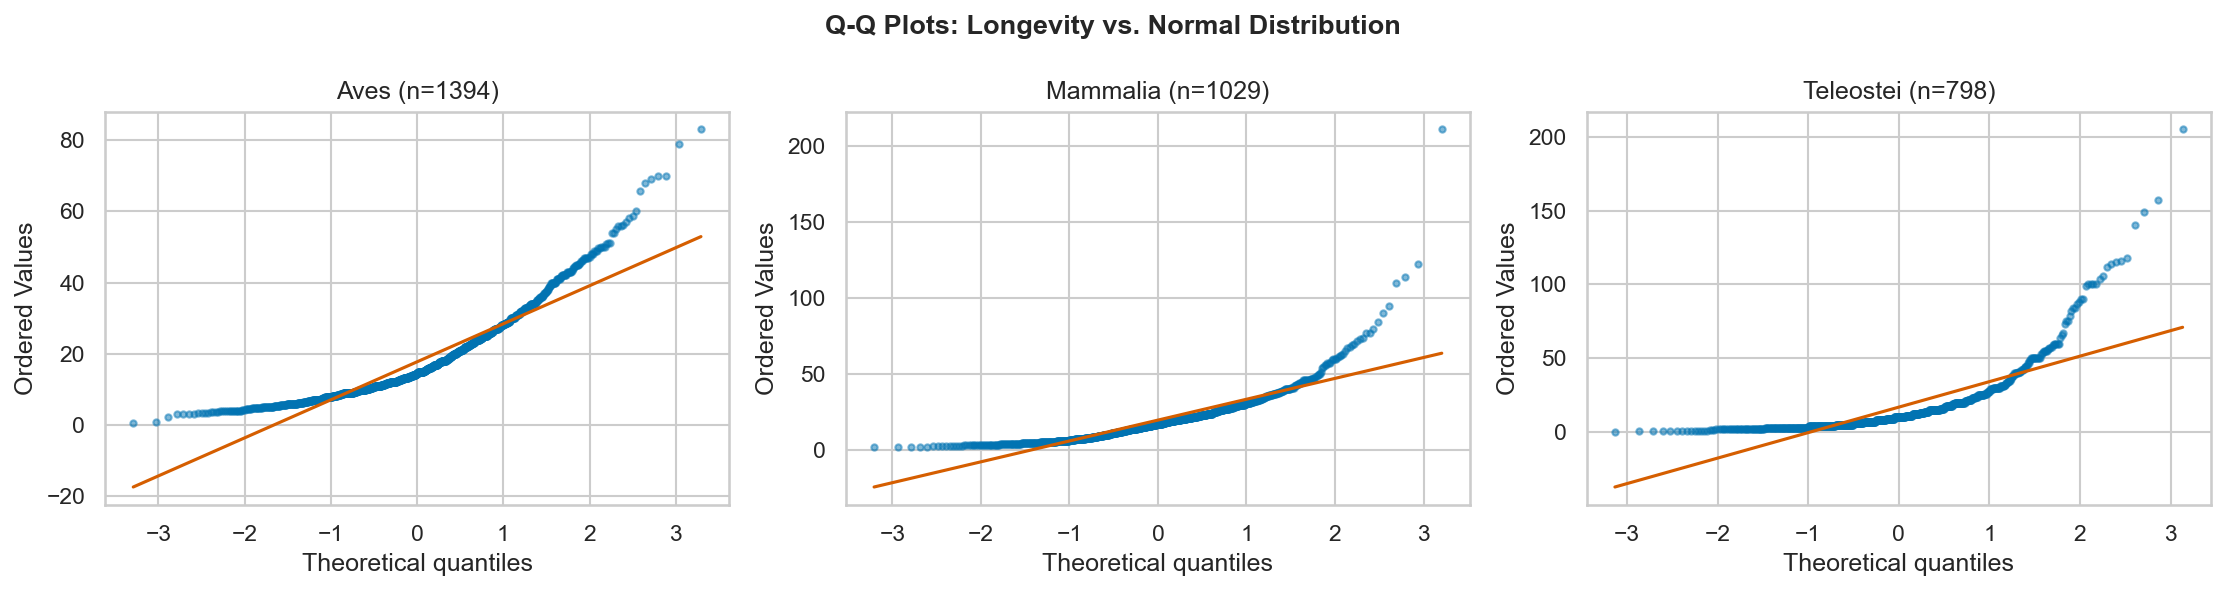

Q-Q plots show heavy right-tail departure from normality in all classes,
further justifying the non-parametric Kruskal-Wallis test.


In [11]:
# Prepare data: filter to vertebrate classes with non-null longevity
test_df = df[df['Class'].isin(VERTEBRATE_CLASSES)].dropna(subset=['max_longevity_yrs'])
groups = [grp['max_longevity_yrs'].values for _, grp in test_df.groupby('Class')]

# Levene's test: checks the equal-variance assumption
levene_stat, levene_p = stats.levene(*groups)
print(f"Levene's test for equal variances:")
print(f"  W = {levene_stat:.4f}, p = {levene_p:.2e}")
print(f"  -> Variances are {'UNEQUAL' if levene_p < 0.05 else 'equal'} "
      f"(confirms one-way ANOVA would be inappropriate)\n")

# Q-Q plots: visual check of normality for the three largest classes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, cls in zip(axes, ['Aves', 'Mammalia', 'Teleostei']):
    class_data = test_df[test_df['Class'] == cls]['max_longevity_yrs'].dropna()
    stats.probplot(class_data, dist='norm', plot=ax)
    ax.set_title(f'{cls} (n={len(class_data)})')
    ax.get_lines()[0].set(markersize=3, alpha=0.5)

fig.suptitle('Q-Q Plots: Longevity vs. Normal Distribution',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{FIGURES_DIR}fig5_qq_plots.png', bbox_inches='tight')
plt.show()
print('Q-Q plots show heavy right-tail departure from normality in all classes,')
print('further justifying the non-parametric Kruskal-Wallis test.')

### 6.2 Baseline Approach: One-Way ANOVA (Parametric)

As a baseline, we apply the standard one-way ANOVA. This is the default
parametric test for comparing means across groups, but it assumes
normality within each group and equal variances across groups. Both
assumptions are violated here (confirmed above), so these results serve
as a comparison point rather than the primary analysis.

In [12]:
# Baseline: One-Way ANOVA (parametric)
# Compares group means; assumes normality + homoscedasticity.
# Both assumptions are violated, but we run it for comparison.
n_total = sum(len(g) for g in groups)
k = len(groups)

f_stat, anova_p = stats.f_oneway(*groups)

# Effect size: eta-squared = (F * df_between) / (F * df_between + df_within)
eta_sq = (f_stat * (k - 1)) / (f_stat * (k - 1) + (n_total - k))

print('BASELINE: One-Way ANOVA')
print(f'  F-statistic    = {f_stat:.4f}')
print(f'  p-value        = {anova_p:.2e}')
print(f'  Effect size    = {eta_sq:.4f} (eta-squared)')
print(f'  Groups (k)     = {k}')
print(f'  Total n        = {n_total:,}')
print(f'\nConclusion: {"REJECT" if anova_p < 0.05 else "FAIL TO REJECT"} H0.')
print(f'\nCaveat: Normality and equal-variance assumptions are violated.')
print(f'Results may be unreliable. See non-parametric alternative below.')

BASELINE: One-Way ANOVA
  F-statistic    = 12.6702
  p-value        = 3.03e-10
  Effect size    = 0.0128 (eta-squared)
  Groups (k)     = 5
  Total n        = 3,909

Conclusion: REJECT H0.

Caveat: Normality and equal-variance assumptions are violated.
Results may be unreliable. See non-parametric alternative below.


### 6.3 Selected Approach: Kruskal-Wallis H-Test (Non-Parametric)

Given the three assumption violations documented above (non-normality,
unequal variances, unbalanced groups), the Kruskal-Wallis test is the
appropriate alternative. It compares rank distributions rather than means,
making it robust to all three violations (Kruskal & Wallis, 1952).

In [13]:
# Kruskal-Wallis H-test (non-parametric one-way ANOVA on ranks)
h_stat, kw_p = stats.kruskal(*groups)
n_total = sum(len(g) for g in groups)

# Effect size: epsilon-squared = H / (n - 1)
# Measures proportion of variance in ranks explained by group membership.
# Benchmarks: ~0.01 = small, ~0.06 = medium, ~0.14 = large
epsilon_sq = h_stat / (n_total - 1)

print('Kruskal-Wallis H-test Results:')
print(f'  H-statistic    = {h_stat:.4f}')
print(f'  p-value        = {kw_p:.2e}')
print(f'  Groups (k)     = {len(groups)}')
print(f'  Total n        = {n_total:,}')
print(f'  Effect size    = {epsilon_sq:.4f} (epsilon-squared; '
      f'{"small" if epsilon_sq < 0.06 else "medium" if epsilon_sq < 0.14 else "large"} effect)')
print(f'\nConclusion: {"REJECT" if kw_p < 0.05 else "FAIL TO REJECT"} H0 at alpha = 0.05.')
if kw_p < 0.05:
    print('There is a statistically significant difference in maximum longevity')
    print('across the five vertebrate classes.')

Kruskal-Wallis H-test Results:
  H-statistic    = 193.5095
  p-value        = 9.33e-41
  Groups (k)     = 5
  Total n        = 3,909
  Effect size    = 0.0495 (epsilon-squared; small effect)

Conclusion: REJECT H0 at alpha = 0.05.
There is a statistically significant difference in maximum longevity
across the five vertebrate classes.


### 6.4 Post-Hoc Pairwise Comparisons

Since the omnibus Kruskal-Wallis test rejects H0, post-hoc pairwise
Mann-Whitney U tests identify which specific class pairs differ.
Bonferroni correction controls the family-wise error rate across
all 10 comparisons.

In [14]:
# Post-hoc: pairwise Mann-Whitney U tests with Bonferroni correction.
# Since Kruskal-Wallis only tells us "at least one group differs," pairwise
# tests identify WHICH specific class pairs have different longevity.
class_groups = {name: grp['max_longevity_yrs'].values
                for name, grp in test_df.groupby('Class')}
pairs = list(combinations(class_groups.keys(), 2))
n_comparisons = len(pairs)
bonferroni_alpha = 0.05 / n_comparisons

print(f'Post-hoc Mann-Whitney U tests ({n_comparisons} pairwise comparisons)')
print(f'Bonferroni-corrected alpha = {bonferroni_alpha:.4f}\n')

results = []
for c1, c2 in pairs:
    u_stat, p_val = stats.mannwhitneyu(
        class_groups[c1], class_groups[c2], alternative='two-sided')
    adjusted_p = min(p_val * n_comparisons, 1.0)
    sig = ('***' if adjusted_p < 0.001 else '**' if adjusted_p < 0.01
           else '*' if adjusted_p < 0.05 else 'ns')
    results.append({
        'Class 1': c1, 'Class 2': c2, 'U': u_stat,
        'p_raw': p_val, 'p_adjusted': adjusted_p, 'Significance': sig
    })

posthoc_df = pd.DataFrame(results)
print(posthoc_df.to_string(index=False))

sig_count = sum(1 for r in results if r['p_adjusted'] < 0.05)
print(f'\n{sig_count} of {n_comparisons} pairs differ significantly after correction.')

Post-hoc Mann-Whitney U tests (10 pairwise comparisons)
Bonferroni-corrected alpha = 0.0050

 Class 1   Class 2        U        p_raw   p_adjusted Significance
Amphibia      Aves  95046.5 9.640438e-04 9.640438e-03           **
Amphibia  Mammalia  66436.0 3.234851e-05 3.234851e-04          ***
Amphibia  Reptilia  27930.5 3.252460e-11 3.252460e-10          ***
Amphibia Teleostei  75048.5 1.204528e-03 1.204528e-02            *
    Aves  Mammalia 679693.0 2.751097e-02 2.751097e-01           ns
    Aves  Reptilia 303811.5 6.732086e-09 6.732086e-08          ***
    Aves Teleostei 701467.5 2.217185e-24 2.217185e-23          ***
Mammalia  Reptilia 245866.0 3.120279e-03 3.120279e-02            *
Mammalia Teleostei 523472.0 5.751832e-24 5.751832e-23          ***
Reptilia Teleostei 289267.5 1.918529e-31 1.918529e-30          ***

9 of 10 pairs differ significantly after correction.


### 6.5 Method Comparison: Parametric vs. Non-Parametric

The table below compares the baseline (ANOVA) and selected (Kruskal-Wallis)
approaches. Both tests reach the same conclusion (reject H0), but they
differ in their assumptions, test statistics, and estimated effect sizes.
This comparison demonstrates why method selection matters and validates
the robustness of the finding.

In [15]:
# Side-by-side comparison of parametric vs. non-parametric approaches
comparison = pd.DataFrame({
    'Metric': ['Test Statistic', 'Statistic Value', 'p-value',
               'Effect Size', 'Effect Size Type', 'Effect Magnitude',
               'Assumes Normality', 'Assumes Equal Variance',
               'Robust to Violations'],
    'ANOVA (Baseline)': [
        'F', f'{f_stat:.4f}', f'{anova_p:.2e}',
        f'{eta_sq:.4f}', 'eta-squared', 'small',
        'Yes (VIOLATED)', 'Yes (VIOLATED)', 'No'],
    'Kruskal-Wallis (Selected)': [
        'H', f'{h_stat:.4f}', f'{kw_p:.2e}',
        f'{epsilon_sq:.4f}', 'epsilon-squared', 'small',
        'No', 'No', 'Yes']
})
print(comparison.to_string(index=False))
print(f'\nKey observations:')
print(f'  - Both tests reject H0 (p < 0.001), confirming the finding is robust.')
print(f'  - KW effect size ({epsilon_sq:.4f}) is ~4x larger than ANOVA eta-sq ({eta_sq:.4f}).')
print(f'  - The discrepancy arises because ANOVA compares means (distorted by')
print(f'    extreme right-skew), while KW compares ranks (robust to skew).')
print(f'  - The KW test detects the between-class signal more effectively')
print(f'    because rank-based analysis is not dominated by outliers.')

                Metric ANOVA (Baseline) Kruskal-Wallis (Selected)
        Test Statistic                F                         H
       Statistic Value          12.6702                  193.5095
               p-value         3.03e-10                  9.33e-41
           Effect Size           0.0128                    0.0495
      Effect Size Type      eta-squared           epsilon-squared
      Effect Magnitude            small                     small
     Assumes Normality   Yes (VIOLATED)                        No
Assumes Equal Variance   Yes (VIOLATED)                        No
  Robust to Violations               No                       Yes

Key observations:
  - Both tests reject H0 (p < 0.001), confirming the finding is robust.
  - KW effect size (0.0495) is ~4x larger than ANOVA eta-sq (0.0128).
  - The discrepancy arises because ANOVA compares means (distorted by
    extreme right-skew), while KW compares ranks (robust to skew).
  - The KW test detects the between-class 

## 7. Summary

This analysis examined maximum longevity across 4,645 species from the
AnAge database (de Magalhaes & Costa, 2009), focusing on five major
vertebrate classes. Following the initial data analysis (IDA) framework
advocated by Lusa et al. (2024), exploratory screening revealed severe
right-skewness, unequal variances (Levene W = 12.45, p < 0.001), and
highly unbalanced group sizes (162 to 1,394 species), motivating a
non-parametric approach over the standard ANOVA baseline.

Both the parametric baseline (one-way ANOVA: F = 12.67, p = 3.03 x 10^-10,
eta-sq = 0.013) and the non-parametric Kruskal-Wallis test (H = 193.5,
p = 9.33 x 10^-41, epsilon-sq = 0.050) confirmed statistically significant
differences in longevity across classes, validating the robustness of the
finding regardless of method. The Kruskal-Wallis test detected a
substantially larger effect because rank-based analysis is not distorted
by the extreme outliers that inflate group means.

Post-hoc Mann-Whitney U tests (Bonferroni-corrected) showed 9 of 10 class
pairs differ significantly; the sole exception was Aves vs. Mammalia
(adjusted p = 0.275), suggesting birds and mammals share similar longevity
distributions. The allometric relationship between body size and longevity
was quantified at Pearson r = 0.57 (n = 3,131).

Key challenges included high missingness across many variables (metabolic
rate only 14% complete), taxonomic overrepresentation of well-studied taxa
(Passeriformes alone: 619 species), and potential inflation of longevity
estimates from captive specimens (41% of records). These limitations
constrain generalizability and should inform any downstream use of these
findings.

## 8. References

de Magalhaes, J. P., & Costa, J. (2009). A database of vertebrate
longevity records and their relation to other life-history traits.
*Journal of Evolutionary Biology*, 22(8), 1770-1774.
https://doi.org/10.1111/j.1420-9101.2009.01783.x

Human Ageing Genomic Resources [HAGR]. (2023). *AnAge: The Animal
Ageing and Longevity Database*. University of Liverpool.
https://genomics.senescence.info/species/

Kruskal, W. H., & Wallis, W. A. (1952). Use of ranks in one-criterion
variance analysis. *Journal of the American Statistical Association*,
47(260), 583-621. https://doi.org/10.2307/2280779

Lusa, L., Proust-Lima, C., Schmidt, C. O., Lee, K. J., le Cessie, S.,
Baillie, M., Lawrence, F., & Huebner, M. (2024). Initial data analysis
for longitudinal studies to build a solid foundation for reproducible
analysis. *PLoS ONE*, 19(5), e0295726.
https://doi.org/10.1371/journal.pone.0295726

Midway, S. R. (2020). Principles of effective data visualization.
*Patterns*, 1(9), 100141. https://doi.org/10.1016/j.patter.2020.100141